In [214]:
import json
import re
import numpy as np
from numpy.linalg import norm

from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

from readability import Readability

from collections import Counter

import spacy
import textdescriptives as td

import pandas as pd

from sklearn import preprocessing
from tqdm import tqdm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.mixture import GaussianMixture
import random
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

In [2]:
with open('Data/data.json', 'r', encoding="utf-8") as handle:
    dataf = json.load(handle)

testConversation = list(dataf[3].keys())[0]
print(testConversation)

W: So, I've had a look at your résumé, and you seem to have the relevant work experience. I've also checked your references, and your former employers all have nothing but good things to say about you. ---M: That's good to hear. I've been very fortunate to have worked with some great companies, under strong and inspiring leadership. ---W: Well, I just have a couple of questions for you. Where do you see yourself five years from now? ---M: Well, at my age, I'm really looking for a job that can offer me some security. Most importantly, I want a job that can give me the opportunity to build a successful career. (12) (13) I don't want to put myself in a position where I am unable to reach my full potential. (13)---W: I understand. You're open to movement within the company? ---M: Exactly. In fact, the reason I left my last two jobs was because there was no room for promotion. (13)---W: You seem very determined. We like that. I'm certain you will be given every opportunity when the appropri

In [3]:
def getMaterialDifficulty(dataf):
    
    materialsDifficultyLevel = []
    # questionsDifficultyLevel = []

    for data in tqdm(dataf):
        conv = list(data.keys())[0]
        conv = re.sub(r'\(*\d*\)', r'',conv)
        
        ques = list(data.values())[0]
        lenQues = len(ques)
    #     ques = list(data.values())[0]

        if len(conv.split()) < 100:
            materialsDifficultyLevel.append(1*0.5*lenQues)
        else:
            readability = Readability(conv)
            readabilityLevel = readability.dale_chall()
            materialsDifficultyLevel.append((readabilityLevel.score)*0.5*lenQues)   
    
#     materialDifficultyLevelNor = np.divide(materialsDifficultyLevel, max(materialsDifficultyLevel))
    materialDifficultyLevelNor = minmax_scale(materialsDifficultyLevel, feature_range=(-1, 1))
    
    return materialDifficultyLevelNor

def getQuestionsDifficulty(dataf, materialDifficultyLevelNor):
    questionsDifficultyLevelNor = []
    for i, data in tqdm(enumerate(dataf)):
        ques = list(data.values())[0]
        questionsDifficultyLevelNor.append([materialDifficultyLevelNor[i]]*len(ques))
    
    return questionsDifficultyLevelNor

In [4]:
matDiff = getMaterialDifficulty(dataf=dataf)
quesDiff = getQuestionsDifficulty(dataf=dataf, materialDifficultyLevelNor=matDiff)
print(quesDiff)

100%|███████████████████████████████████████████████████████████████████████████| 12447/12447 [00:42<00:00, 291.34it/s]
12447it [00:00, 957355.35it/s]

[[-1.0], [-1.0], [-0.9633037399721855, -0.9633037399721855], [-0.20344727766174997, -0.20344727766174997, -0.20344727766174997], [-0.1625168743434533, -0.1625168743434533, -0.1625168743434533], [0.1563355154986641, 0.1563355154986641, 0.1563355154986641, 0.1563355154986641], [-1.0], [-1.0], [-1.0], [-1.0], [-0.14321660313985884, -0.14321660313985884, -0.14321660313985884], [0.035961183340127434, 0.035961183340127434, 0.035961183340127434, 0.035961183340127434], [-0.2497039306405754, -0.2497039306405754, -0.2497039306405754], [-1.0], [-1.0], [-1.0], [-0.9266074799443711, -0.9266074799443711, -0.9266074799443711], [-0.9633037399721855, -0.9633037399721855], [-0.9633037399721855, -0.9633037399721855], [-1.0], [-0.2614371333321859, -0.2614371333321859, -0.2614371333321859], [-0.5335693922680903, -0.5335693922680903], [-1.0], [-1.0], [-0.028595741840592215, -0.028595741840592215, -0.028595741840592215], [-0.5048395636496057, -0.5048395636496057], [-0.5014151254952836, -0.5014151254952836], 

In [5]:
materials_difficulty = pd.DataFrame(data = matDiff, columns = ['Materials Difficulty'])
# questions_difficulty = pd.DataFrame(data = quesDiff, columns = ['Questions Difficulty'])
# display(difficulty_levels)
# materials_difficulty.to_csv("Data\Diffculty Level\Materials_Difficulty.csv", index=False)
# materials_difficulty.to_csv("Data\Diffculty Level\Materials_Difficulty_Index.csv")

In [6]:
print(Counter(matDiff))

Counter({-1.0: 6897, -0.9633037399721855: 757, -0.9266074799443711: 201, -0.8899112199165566: 26, -0.266743588782718: 3, -0.5214530024005453: 3, -0.2576699396428298: 2, -0.5157846942085378: 2, -0.4194280446360632: 2, -0.08769264340691219: 2, -0.2370096390241705: 2, -0.008036108225562888: 2, -0.5230832068074746: 2, -0.17628927224976199: 2, -0.05169073189844642: 2, -0.34538539477938246: 2, -0.2014176631391945: 2, -0.4663823356126279: 2, -0.5338348354194388: 2, -0.3200813235224721: 2, -0.2569817637460621: 2, -0.49026515124503334: 2, -0.1917391589138746: 2, -0.24849803820024263: 2, -0.4778231810247282: 2, -0.12147572059349099: 2, -0.4967020135285778: 2, -0.09670688091133628: 2, -0.46266321023206936: 2, -0.24602016569934515: 2, -0.47771039741403254: 2, -0.5059097662876638: 2, -0.2884473921130186: 2, -0.19741522321119342: 2, -0.5190581488707361: 2, -0.5284764959548215: 2, -0.1218851023229206: 2, -0.28890410736486105: 2, -0.45072310007880956: 2, -0.21107080880058626: 2, -0.49575129083926917: 

In [7]:
# materialsDifficultyLevel = []
# # questionsDifficultyLevel = []

# for data in dataf:
#     conv = list(data.keys())[0]
#     conv = re.sub(r'\(*\d*\)', r'',conv)
    
#     ques = list(data.values())[0]
#     lenQues = len(ques)
# #     ques = list(data.values())[0]
    
#     if len(conv.split()) < 100:
#         materialsDifficultyLevel.append(1 + (0.5*lenQues))
#     else:
#         readability = Readability(conv)
#         readabilityLevel = readability.dale_chall()
#         materialsDifficultyLevel.append(readabilityLevel.score + (0.5*lenQues))   
    
# #     questionsDifficultLevel.append([readabilityLevel.score]*len(ques))
    
# print(materialsDifficultyLevel)

In [8]:
# materialsDifficultyLevel = []

# for data in dataf:
#     conv = list(data.keys())[0]
#     conv = re.sub(r'\(*\d*\)', r'',conv)
    
#     ques = list(data.values())[0]
#     lenQues = len(ques)
# #     ques = list(data.values())[0]
    
#     if len(conv.split()) < 100:
#         materialsDifficultyLevel.append(1 + (0.5*lenQues))
#     else:
#         readability = Readability(conv)
#         readabilityLevel = readability.flesch_kincaid()
#         materialsDifficultyLevel.append(readabilityLevel.score + (0.5*lenQues))   
    
# #     questionsDifficultLevel.append([readabilityLevel.score]*len(ques))
    
# print(materialsDifficultyLevel)

In [9]:
# print("Max", max(materialsDifficultyLevel))
# print("Min", min(materialsDifficultyLevel))
# materialDifficultyLevelNor = np.divide(materialsDifficultyLevel, max(materialsDifficultyLevel))
# print(materialDifficultyLevelNor)

In [10]:
# questionsDifficultyLevelNor = []
# for i, data in enumerate(dataf):
#     ques = list(data.values())[0]   
#     questionsDifficultyLevelNor.append([materialDifficultyLevelNor[i]]*len(ques))
# print(questionsDifficultyLevelNor)

In [11]:
# print(questionsDifficultyLevelNor[1])

In [12]:
def getMaterialFeatures(dataf):
    
    materialsFeatures = pd.DataFrame()
    # questionsDifficultyLevel = []
    
#     nlp = spacy.load("en_core_web_sm")
#     nlp.add_pipe("textdescriptives/all") 
    
    
    for data in tqdm(dataf):
        conv = list(data.keys())[0]
        conv = re.sub(r'\(*\d*\)', r'',conv)
        
#         ques = list(data.values())[0]
#         lenQues = len(ques)

        metrics = td.extract_metrics(
        text=data,
        spacy_model="en_core_web_sm",
        metrics=["readability"],)
    
        materialsFeatures = pd.concat([metrics.drop(columns=["text"]), materialsFeatures.loc[:]])
        
#         readability = Readability(conv)
#         readabilityLevel = readability.dale_chall()
#         materialsDifficultyLevel.append((readabilityLevel.score)*0.5*lenQues)   
    
    
    return materialsFeatures

In [13]:
# materialsFeaturesDF = getMaterialFeatures(dataf=dataf[0:12])
# display(materialsFeaturesDF)

In [14]:
# display(materialsFeaturesDF)
# materialsFeaturesDF.to_csv("D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\Data\Diffculty Level\Difficulty_Level_Features.csv", index=False)

In [15]:
difficuluty_level = pd.read_csv("Data\Diffculty Level\Difficulty_Level_Features.csv")
display(difficuluty_level)

,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,...,n_characters,n_sentences,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,3.242424,3.0,1.633555,4.125000,3.0,3.018174,1.272727,1.0,0.749656,33,...,126,8,94.975398,1.036932,5.985473,4.074242,-4.095682,-3.910303,13.215909,0.375000
1,3.214286,3.0,1.566551,4.000000,4.0,2.563480,1.178571,1.0,0.600807,28,...,107,7,103.067857,-0.122857,5.288315,3.028571,-4.290714,-4.300000,7.571429,0.142857
2,3.571429,4.0,1.498298,5.000000,3.0,3.505098,1.257143,1.0,0.839825,35,...,135,7,95.405714,1.194286,6.868970,5.428571,-2.108571,-0.720000,7.857143,0.142857
3,3.477273,4.0,1.678590,5.500000,1.5,6.461424,1.306818,1.0,0.788525,88,...,340,16,90.695682,1.975455,6.627428,4.927273,-2.302045,-0.735455,11.181818,0.312500
4,3.000000,2.5,1.483240,10.000000,10.0,0.000000,1.000000,1.0,0.000000,10,...,35,1,112.085000,0.110000,NaN,4.000000,-2.300000,-1.120000,10.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,3.753086,4.0,1.614218,7.714286,7.0,5.815766,1.203704,1.0,0.649205,162,...,634,21,97.171667,1.622275,6.427356,4.814109,0.104180,2.431111,15.738977,0.619048
12443,4.229508,4.0,2.454349,9.150000,8.0,6.951798,1.426230,1.0,0.870758,183,...,833,20,76.888734,4.808008,9.516145,9.124481,3.065984,5.834536,26.089891,1.550000
12444,3.897727,4.0,1.630949,5.866667,7.0,5.018189,1.340909,1.0,0.796104,88,...,375,15,87.439424,2.520727,6.742158,5.073939,-0.138371,2.073182,13.821212,0.466667
12445,3.756757,3.0,2.005471,9.250000,10.5,3.897114,1.324324,1.0,0.699577,37,...,148,4,85.408412,3.644527,8.076483,6.943243,0.889324,3.089730,20.060811,1.000000


In [16]:
materialsFeaturesArray = difficuluty_level.values #returns a numpy array
materialsFeaturesColumnsName = list(difficuluty_level.columns)
min_max_scaler = preprocessing.MinMaxScaler()
materialsFeaturesArrayScaled = min_max_scaler.fit_transform(materialsFeaturesArray)
difficuluty_level_nor = pd.DataFrame(data = materialsFeaturesArrayScaled, columns = materialsFeaturesColumnsName)
difficuluty_level_nor["dale_chall_score"] = matDiff[::-1]

In [16]:
# difficuluty_level_nor.to_csv("Data\Diffculty Level\Difficulty_Level_Features_Nor.csv", index=False)
difficuluty_level_nor = pd.read_csv("Data\Diffculty Level\Difficulty_Level_Features_Nor.csv")
display(difficuluty_level_nor)

,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,n_tokens,...,n_sentences,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix,dale_chall_score
0,0.185606,0.2,0.252999,0.053125,0.046512,0.116974,0.272727,0.0,0.375408,0.069977,...,0.101449,0.710300,0.177969,0.223607,0.141158,0.117475,0.197744,0.153603,0.028846,0.018018
1,0.178571,0.2,0.242621,0.050000,0.069767,0.099351,0.178571,0.0,0.300868,0.058691,...,0.086957,0.807117,0.121527,0.169031,0.089804,0.111038,0.182624,0.073627,0.010989,0.018018
2,0.267857,0.4,0.232050,0.075000,0.046512,0.135845,0.257143,0.0,0.420562,0.074492,...,0.086957,0.715448,0.185627,0.292770,0.207671,0.183060,0.321531,0.077676,0.010989,0.018018
3,0.244318,0.4,0.259973,0.087500,0.011628,0.250422,0.306818,0.0,0.394872,0.194131,...,0.217391,0.659098,0.223644,0.273861,0.183051,0.176675,0.320932,0.124782,0.024038,0.036035
4,0.125000,0.1,0.229718,0.200000,0.209302,0.000000,0.000000,0.0,0.000000,0.018059,...,0.000000,0.914997,0.132859,NaN,0.137512,0.176742,0.306011,0.108037,0.000000,0.018018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,0.313272,0.4,0.250004,0.142857,0.139535,0.225399,0.203704,0.0,0.325105,0.361174,...,0.289855,0.736576,0.206456,0.258199,0.177494,0.256092,0.443798,0.189352,0.047619,0.429214
12443,0.432377,0.4,0.380120,0.178750,0.162791,0.269427,0.426230,0.0,0.436052,0.408578,...,0.275362,0.493913,0.361494,0.500000,0.389182,0.353847,0.575854,0.336013,0.119231,0.409118
12444,0.349432,0.4,0.252595,0.096667,0.139535,0.194487,0.340909,0.0,0.398668,0.194131,...,0.202899,0.620140,0.250180,0.282843,0.190254,0.248087,0.429910,0.162180,0.035897,0.036035
12445,0.314189,0.2,0.310599,0.181250,0.220930,0.151038,0.324324,0.0,0.350330,0.079007,...,0.043478,0.595842,0.304871,0.387298,0.282058,0.282006,0.469353,0.250588,0.076923,0.018018


In [18]:
# print(materialsFeaturesColumnsName)

In [29]:
text_features_nor = difficuluty_level_nor[['token_length_mean', 'sentence_length_mean', 
                                                  'syllables_per_token_mean', 'proportion_unique_tokens', 'n_sentences']]
readability_score_nor = difficuluty_level_nor[['flesch_reading_ease', 'flesch_kincaid_grade', 'smog', 'gunning_fog', 
                                               'automated_readability_index', 'coleman_liau_index', 'lix', 'rix']]

display(text_features_nor)
display(readability_score_nor)

text_features_nor_array = text_features_nor.values[::-1]
readability_score_nor_array = readability_score_nor.values[::-1]

print(text_features_nor_array)


for i, data in tqdm(enumerate(dataf)):   
    ques = list(data.values())[0]
    lenQues = len(ques)
    text_features_nor_array[i] = text_features_nor_array[i]*0.7*lenQues
    readability_score_nor_array[i] = readability_score_nor_array[i]*0.7*lenQues

# for i, data in tqdm(enumerate(dataf)):   
#     ques = list(data.values())[0]
#     lenQues = len(ques)
#     text_features_nor_array[i] = text_features_nor_array[i]
#     readability_score_nor_array[i] = readability_score_nor_array[i]   
    
readability_score_nor_array[np.isnan(readability_score_nor_array)] = 0

print(text_features_nor_array)
print(readability_score_nor_array)

,token_length_mean,sentence_length_mean,syllables_per_token_mean,proportion_unique_tokens,n_sentences
0,0.185606,0.053125,0.272727,0.851337,0.101449
1,0.178571,0.050000,0.178571,0.766387,0.086957
2,0.267857,0.075000,0.257143,0.532773,0.086957
3,0.244318,0.087500,0.306818,0.331016,0.217391
4,0.125000,0.200000,0.000000,1.000000,0.000000
...,...,...,...,...,...
12442,0.313272,0.142857,0.203704,0.313580,0.289855
12443,0.432377,0.178750,0.426230,0.428094,0.275362
12444,0.349432,0.096667,0.340909,0.535428,0.202899
12445,0.314189,0.181250,0.324324,0.823211,0.043478


,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,0.710300,0.177969,0.223607,0.141158,0.117475,0.197744,0.153603,0.028846
1,0.807117,0.121527,0.169031,0.089804,0.111038,0.182624,0.073627,0.010989
2,0.715448,0.185627,0.292770,0.207671,0.183060,0.321531,0.077676,0.010989
3,0.659098,0.223644,0.273861,0.183051,0.176675,0.320932,0.124782,0.024038
4,0.914997,0.132859,NaN,0.137512,0.176742,0.306011,0.108037,0.000000
...,...,...,...,...,...,...,...,...
12442,0.736576,0.206456,0.258199,0.177494,0.256092,0.443798,0.189352,0.047619
12443,0.493913,0.361494,0.500000,0.389182,0.353847,0.575854,0.336013,0.119231
12444,0.620140,0.250180,0.282843,0.190254,0.248087,0.429910,0.162180,0.035897
12445,0.595842,0.304871,0.387298,0.282058,0.282006,0.469353,0.250588,0.076923


[[0.28240741 0.0625     0.40740741 1.         0.07246377]
 [0.31418919 0.18125    0.32432432 0.82321145 0.04347826]
 [0.34943182 0.09666667 0.34090909 0.53542781 0.20289855]
 ...
 [0.26785714 0.075      0.25714286 0.53277311 0.08695652]
 [0.17857143 0.05       0.17857143 0.76638655 0.08695652]
 [0.18560606 0.053125   0.27272727 0.8513369  0.10144928]]


12447it [00:00, 113175.01it/s]

[[0.19768519 0.04375    0.28518519 0.7        0.05072464]
 [0.21993243 0.126875   0.22702703 0.57624801 0.03043478]
 [0.48920455 0.13533333 0.47727273 0.74959893 0.28405797]
 ...
 [0.1875     0.0525     0.18       0.37294118 0.06086957]
 [0.125      0.035      0.125      0.53647059 0.06086957]
 [0.12992424 0.0371875  0.19090909 0.59593583 0.07101449]]
[[0.39860122 0.1837     0.25560386 ... 0.2165013  0.13127829 0.02692308]
 [0.41708905 0.21341    0.27110883 ... 0.32854712 0.17541126 0.05384615]
 [0.86819637 0.35025233 0.3959798  ... 0.60187384 0.22705145 0.05025641]
 ...
 [0.50081354 0.12993905 0.20493902 ... 0.22507203 0.05437294 0.00769231]
 [0.56498176 0.08506871 0.1183216  ... 0.12783657 0.05153918 0.00769231]
 [0.49720977 0.12457857 0.15652476 ... 0.13842103 0.10752222 0.02019231]]


### Evaluate Readability Formula Difficulty Level

In [27]:
cosin_sim_eval = []

difficuluty_level_nor_fillna = difficuluty_level_nor.fillna(0)

for fir_read_type in ['flesch_kincaid_grade', 'smog', 'automated_readability_index', 'coleman_liau_index', 'gunning_fog', 'lix', 'rix']:
    temp = []
    for sec_read_type in ['flesch_kincaid_grade', 'smog', 'automated_readability_index', 'coleman_liau_index', 'gunning_fog', 'lix', 'rix']:
        cosin_simi = np.dot(difficuluty_level_nor_fillna[fir_read_type], 
                            difficuluty_level_nor_fillna[sec_read_type])/(norm(difficuluty_level_nor_fillna[fir_read_type])*norm(difficuluty_level_nor_fillna[sec_read_type]))
        temp.append(cosin_simi)
    cosin_sim_eval.append(temp)
print(cosin_sim_eval)

[[0.9999999999999999, 0.9667904676680402, 0.9855686707557499, 0.9838648437961885, 0.9897710832064219, 0.969704777420941, 0.8715064615467285], [0.9667904676680402, 1.0, 0.9476378469513769, 0.9578798000174892, 0.9712524800166568, 0.9247349561518072, 0.8085477260648656], [0.9855686707557499, 0.9476378469513769, 0.9999999999999999, 0.9935893358675744, 0.971116587119415, 0.9807510597317785, 0.8986324549553046], [0.9838648437961885, 0.9578798000174892, 0.9935893358675744, 0.9999999999999998, 0.9678150464008095, 0.9703143161363452, 0.8567672086982864], [0.9897710832064219, 0.9712524800166568, 0.971116587119415, 0.9678150464008095, 1.0000000000000002, 0.9544905278726356, 0.861483825362984], [0.969704777420941, 0.9247349561518072, 0.9807510597317785, 0.9703143161363452, 0.9544905278726356, 1.0000000000000002, 0.9369148213065888], [0.8715064615467285, 0.8085477260648656, 0.8986324549553046, 0.8567672086982864, 0.861483825362984, 0.9369148213065888, 0.9999999999999999]]


In [20]:
a = [0.8,0.1]
b = [0.5,0.5]
print(np.dot(a,b)/(norm(a)*norm(b)))

0.7893522173763262


In [227]:
difficuluty_level_by_DR = pd.read_csv("Data/Diffculty Level/Material_difficuly_by_DR.csv")
difficuluty_level_without_DR = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_directely.csv")
# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
by_DR_scaled = min_max_scaler.fit_transform(difficuluty_level_by_DR.values)
without_DR_scaled = min_max_scaler.fit_transform(difficuluty_level_without_DR.values)
print(by_DR_scaled)
print(without_DR_scaled)

[[0.51790631]
 [0.70268029]
 [0.3928187 ]
 ...
 [0.77712962]
 [0.8582622 ]
 [0.64152762]]
[[0.00149477]
 [0.00298954]
 [0.1509716 ]
 ...
 [0.07473842]
 [0.07623318]
 [0.07772795]]


In [231]:
cosin_sim_eval_dr = []
cosin_sim_eval_without_dr = []
for fir_read_type in ['flesch_kincaid_grade',  'automated_readability_index', 'coleman_liau_index']:
    cosin_simi = np.dot(difficuluty_level_nor_fillna[fir_read_type], 
                        by_DR_scaled)/(norm(difficuluty_level_nor_fillna[fir_read_type])*norm(by_DR_scaled))
    cosin_sim_eval_dr.append(cosin_simi[0])
    cosin_simi = np.dot(difficuluty_level_nor_fillna[fir_read_type], 
                        without_DR_scaled)/(norm(difficuluty_level_nor_fillna[fir_read_type])*norm(without_DR_scaled))
    cosin_sim_eval_without_dr.append(cosin_simi[0])    

print(cosin_sim_eval_dr)
print(cosin_sim_eval_without_dr)

[0.8544607879675818, 0.8446623778560962, 0.8651237225362187]
[0.6301106394495615, 0.6222297738357903, 0.6376223097316606]


# UMAP PART

In [49]:
text_features_nor_umap_1d = umap.UMAP(random_state=42, n_components=1)
text_features_nor_umap_fit_1d = text_features_nor_umap_1d.fit_transform(text_features_nor_array)
print(text_features_nor_umap_fit_1d)

[[ 5.5620637 ]
 [13.630792  ]
 [ 0.09972649]
 ...
 [16.881851  ]
 [20.424757  ]
 [10.960371  ]]


In [50]:
text_features_nor_umap_2d = umap.UMAP(random_state=42, n_components=2)
text_features_nor_umap_fit_2d = text_features_nor_umap_2d.fit_transform(text_features_nor_array)
print(text_features_nor_umap_fit_2d)

[[13.809531   2.4041462]
 [11.613863   5.1119623]
 [-0.6402918 -1.8539398]
 ...
 [ 7.194277   8.443201 ]
 [11.940806  10.094215 ]
 [13.461354   7.372662 ]]


In [21]:
# text_features_nor_fit = minmax_scale(text_features_nor_fit, feature_range=(-2,2))
# Material_difficulty_by_DR = pd.DataFrame(data=text_features_nor_fit, columns=["Material Difficulty"])
# display(Material_difficulty_by_DR)
# Material_difficulty_by_DR.to_csv("Data/Diffculty Level/Material_difficuly_by_DR.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

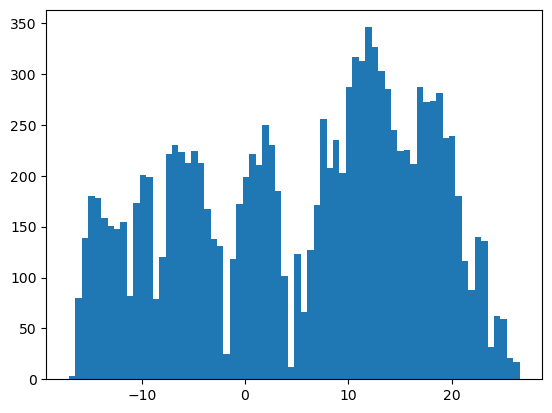

In [51]:
plt.hist(text_features_nor_umap_fit_1d, bins=70)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

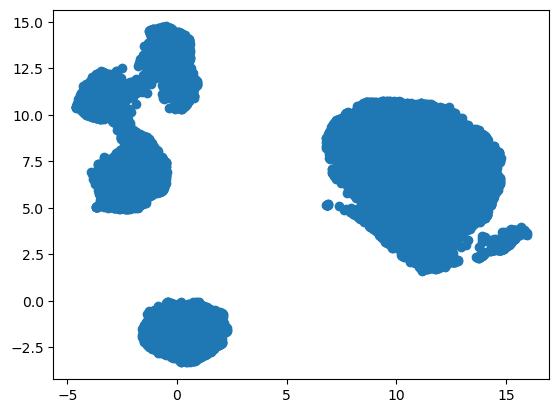

In [54]:
plt.scatter(text_features_nor_umap_fit_2d[:,0], text_features_nor_umap_fit_2d[:,1])
plt.show

### UMAP DR to 1-D & Score Evaluate

In [158]:
km_umap1d_score_sil_list = []
km_umap1d_score_dav_list = []
km_umap1d_score_cal_list = []

for i in range(3, 13):
    text_features_nor_cluster= cluster.KMeans(n_clusters = i, random_state = 42)
    text_features_nor_umap_1d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_umap_fit_1d)
    print(text_features_nor_labels_kmeans)
    umap1d_score_sil = silhouette_score(text_features_nor_umap_fit_1d, text_features_nor_umap_1d_labels_kmeans)
    km_umap1d_score_sil_list.append(umap1d_score_sil)
    umap1d_score_dav = davies_bouldin_score(text_features_nor_umap_fit_1d, text_features_nor_umap_1d_labels_kmeans)
    km_umap1d_score_dav_list.append(umap1d_score_dav)
    umap1d_score_cal = calinski_harabasz_score(text_features_nor_umap_fit_1d, text_features_nor_umap_1d_labels_kmeans)
    km_umap1d_score_cal_list.append(umap1d_score_cal)
print(km_umap1d_score_sil_list)
print(km_umap1d_score_dav_list)
print(km_umap1d_score_cal_list)

[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[8 8 4 ... 0 0 8]
[0.57265437, 0.5762135, 0.59278005, 0.56477004, 0.57279587, 0.56328714, 0.56340444, 0.5597651, 0.5570357, 0.5560186]
[0.5533823060456158, 0.5267486449340664, 0.4794412890861791, 0.50924109050545, 0.5061090452093392, 0.514072559193334, 0.49955563894543825, 0.4942875762360709, 0.4987700425239105, 0.5104178422707744]
[46949.95527179733, 62302.97069957635, 75656.61234577947, 88956.91035689127, 99390.95424448978, 113387.59475777316, 125623.26222116851, 132980.70237954022, 144475.87260068912, 162665.89462894722]


In [159]:
gmm_umap1d_score_sil_list = []
gmm_umap1d_score_dav_list = []
gmm_umap1d_score_cal_list = []

for i in range(3, 13):
    text_features_gmm_model = GaussianMixture(n_components=i, covariance_type='spherical')
    text_features_nor_umap1d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_umap_fit_1d)
    print(text_features_nor_umap1d_labels_gmm)
    umap1d_score_sil = silhouette_score(text_features_nor_umap_fit_1d, text_features_nor_umap1d_labels_gmm)
    gmm_umap1d_score_sil_list.append(umap1d_score_sil)
    umap1d_score_dav = davies_bouldin_score(text_features_nor_umap_fit_1d, text_features_nor_umap1d_labels_gmm)
    gmm_umap1d_score_dav_list.append(umap1d_score_dav)
    umap1d_score_cal = calinski_harabasz_score(text_features_nor_umap_fit_1d, text_features_nor_umap1d_labels_gmm)
    gmm_umap1d_score_cal_list.append(umap1d_score_cal)
print(gmm_umap1d_score_sil_list)
print(gmm_umap1d_score_dav_list)
print(gmm_umap1d_score_cal_list)

[0 2 0 ... 2 2 2]
[0 3 0 ... 1 1 3]
[4 4 0 ... 2 2 4]
[2 4 5 ... 0 0 2]
[3 5 0 ... 1 6 5]
[1 5 4 ... 6 6 5]
[4 7 0 ... 1 3 7]
[4 1 9 ... 6 6 8]
[2 6 3 ... 7 7 8]
[ 0 11  3 ...  2  7  8]
[0.5733454, 0.5790805, 0.59135765, 0.57371056, 0.5701692, 0.56366825, 0.5391132, 0.5387423, 0.5435795, 0.552012]
[0.5414890963577127, 0.5153599135918578, 0.47775929802773953, 0.4957865653177526, 0.5018537552561242, 0.4989550511957343, 0.5253762819344511, 0.5018019986214417, 0.5093285947860404, 0.5137692262667298]
[46515.752800786424, 61930.467653914224, 72953.58095200028, 87103.4991363715, 98548.97382662495, 111513.43007801824, 110887.06825694417, 125706.53950920819, 139449.82025175315, 160770.4939607744]


### UMAP DR to 2-D & Score Evaluate

In [160]:
km_umap2d_score_sil_list = []
km_umap2d_score_dav_list = []
km_umap2d_score_cal_list = []

for i in range(3, 13):
    text_features_nor_cluster= cluster.KMeans(n_clusters = i, random_state = 42)
    text_features_nor_umap_2d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_umap_fit_2d)
    print(text_features_nor_umap_2d_labels_kmeans)
    umap2d_score_sil = silhouette_score(text_features_nor_umap_fit_2d, text_features_nor_umap_2d_labels_kmeans)
    km_umap2d_score_sil_list.append(umap2d_score_sil)
    umap2d_score_dav = davies_bouldin_score(text_features_nor_umap_fit_2d, text_features_nor_umap_2d_labels_kmeans)
    km_umap2d_score_dav_list.append(umap2d_score_dav)
    umap2d_score_cal = calinski_harabasz_score(text_features_nor_umap_fit_2d, text_features_nor_umap_2d_labels_kmeans)
    km_umap2d_score_cal_list.append(umap2d_score_cal)
print(km_umap2d_score_sil_list)
print(km_umap2d_score_dav_list)
print(km_umap2d_score_cal_list)

[0 0 2 ... 0 0 0]
[3 3 0 ... 1 1 3]
[3 3 1 ... 0 0 3]
[0 0 2 ... 5 4 4]
[0 0 3 ... 2 5 5]
[5 6 2 ... 4 1 1]
[5 4 2 ... 7 0 8]
[4 9 2 ... 6 1 7]
[ 8  1  2 ...  7  4 10]
[ 8  7  3 ...  5  0 10]
[0.6963215, 0.53255063, 0.5191162, 0.513096, 0.5128902, 0.5042903, 0.49652433, 0.4934924, 0.50008523, 0.46977293]
[0.4185325579091499, 0.6816935822463972, 0.686308394406759, 0.6892470215720904, 0.6639603487098817, 0.6685291785775858, 0.6983465857562903, 0.7141641357731716, 0.6996243984368161, 0.7602031177948474]
[35448.03353060857, 34797.403564610795, 42281.821946809876, 44476.548609470316, 44817.28612013415, 47112.560088307124, 47903.8468009553, 47790.9958761343, 47281.02954305844, 46760.48807711796]


In [161]:
gmm_umap2d_score_sil_list = []
gmm_umap2d_score_dav_list = []
gmm_umap2d_score_cal_list = []

for i in range(3, 13):
    text_features_gmm_model = GaussianMixture(n_components=i, covariance_type='spherical')
    text_features_nor_umap2d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_umap_fit_2d)
    print(text_features_nor_umap2d_labels_gmm)
    umap2d_score_sil = silhouette_score(text_features_nor_umap_fit_2d, text_features_nor_umap2d_labels_gmm)
    gmm_umap2d_score_sil_list.append(umap2d_score_sil)
    umap2d_score_dav = davies_bouldin_score(text_features_nor_umap_fit_2d, text_features_nor_umap2d_labels_gmm)
    gmm_umap2d_score_dav_list.append(umap2d_score_dav)
    umap2d_score_cal = calinski_harabasz_score(text_features_nor_umap_fit_2d, text_features_nor_umap2d_labels_gmm)
    gmm_umap2d_score_cal_list.append(umap2d_score_cal)
print(gmm_umap2d_score_sil_list)
print(gmm_umap2d_score_dav_list)
print(gmm_umap2d_score_cal_list)

[1 1 0 ... 1 1 1]
[0 0 2 ... 0 0 0]
[1 1 2 ... 4 4 1]
[1 1 2 ... 5 4 4]
[0 0 3 ... 2 5 5]
[5 5 0 ... 1 7 7]
[6 3 2 ... 8 1 1]
[3 7 2 ... 9 6 6]
[4 8 2 ... 7 5 9]
[10  4  2 ...  5  0  7]
[0.6963215, 0.6725092, 0.5156094, 0.5043191, 0.49843806, 0.4968716, 0.4879952, 0.4711227, 0.49946067, 0.491457]
[0.4185325579091499, 0.46724227553160574, 0.6832017593585245, 0.6737300280740871, 0.6956236557549038, 0.6625443894642635, 0.6925965123467605, 0.7063424611999309, 0.6970510170380403, 0.7015379252692487]
[35448.03353060857, 32999.11480223844, 41871.59021212203, 43486.85790914181, 43339.85175975511, 46343.40510133929, 46208.543301737176, 44142.234022138204, 46882.804261875935, 46025.249175946294]


In [191]:
text_features_nor_cluster= cluster.KMeans(n_clusters = 3, random_state = 42)
text_features_nor_umap_2d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_umap_fit_2d)

In [192]:
text_features_gmm_model = GaussianMixture(n_components=3, covariance_type='spherical')
text_features_nor_umap2d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_umap_fit_2d)

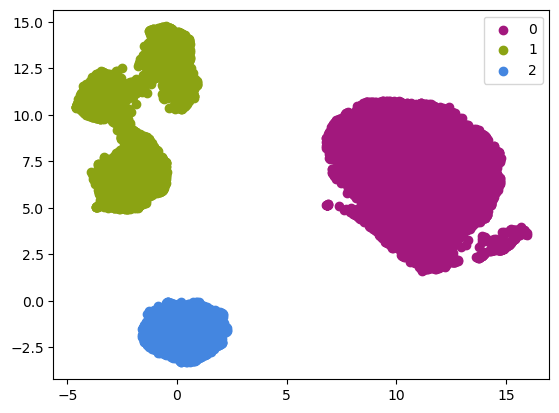

In [193]:
random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_umap_2d_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]


# plt.figure(figsize=(12,10))
for label in set(text_features_nor_umap_2d_labels_kmeans):
    plt.scatter(text_features_nor_umap_fit_2d[text_features_nor_umap_2d_labels_kmeans == label ,0], 
              text_features_nor_umap_fit_2d[text_features_nor_umap_2d_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
plt.legend()
plt.show()

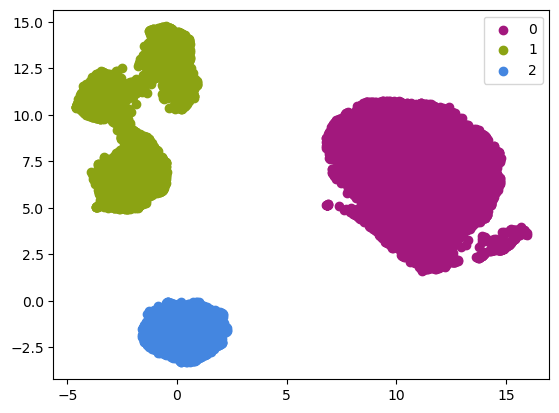

In [194]:
random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_umap2d_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_umap2d_labels_gmm):
    plt.scatter(text_features_nor_umap_fit_2d[text_features_nor_umap2d_labels_gmm == label ,0], 
              text_features_nor_umap_fit_2d[text_features_nor_umap2d_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
plt.legend()
plt.show()

# t-SNE PART

In [55]:
text_features_nor_tsne_1d = TSNE(random_state=42, n_components=1)
text_features_nor_tsne_fit_1d = text_features_nor_tsne_1d.fit_transform(text_features_nor_array)
print(text_features_nor_tsne_fit_1d)

D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-79.64071  ]
 [-64.6074   ]
 [ 90.43465  ]
 ...
 [  5.6615305]
 [-26.16938  ]
 [-44.394825 ]]


In [61]:
text_features_nor_tsne_2d = TSNE(random_state=42, n_components=2)
text_features_nor_tsne_fit_2d = text_features_nor_tsne_2d.fit_transform(text_features_nor_array)
print(text_features_nor_tsne_fit_2d)

D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-18.004618  62.62903 ]
 [-21.151209  28.668509]
 [ 46.147167 -64.39248 ]
 ...
 [-28.379734 -58.48407 ]
 [-81.8522    -6.54852 ]
 [-59.11673   23.380161]]


<function matplotlib.pyplot.show(close=None, block=None)>

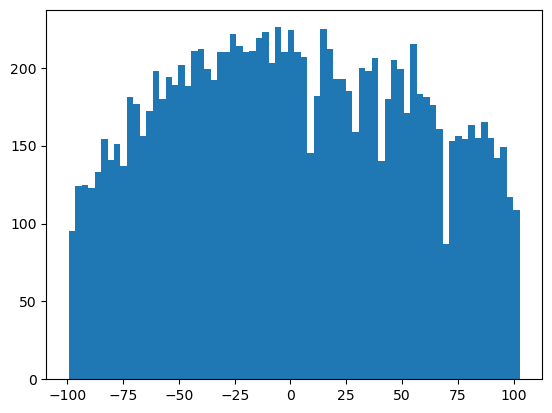

In [58]:
plt.hist(text_features_nor_tsne_fit_1d, bins=70)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

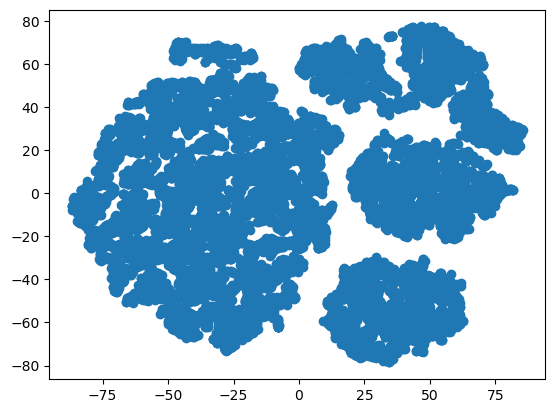

In [62]:
plt.scatter(text_features_nor_tsne_fit_2d[:,0], text_features_nor_tsne_fit_2d[:,1])
plt.show

### t-SNE DR to 1-D & Score Evaluate

In [162]:
km_tsne1d_score_sil_list = []
km_tsne1d_score_dav_list = []
km_tsne1d_score_cal_list = []

for i in range(3, 13):
    text_features_nor_cluster= cluster.KMeans(n_clusters = i, random_state = 42)
    text_features_nor_tsne_1d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_tsne_fit_1d)
    print(text_features_nor_tsne_1d_labels_kmeans)
    tsne1d_score_sil = silhouette_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_kmeans)
    km_tsne1d_score_sil_list.append(tsne1d_score_sil)
    tsne1d_score_dav = davies_bouldin_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_kmeans)
    km_tsne1d_score_dav_list.append(tsne1d_score_dav)
    tsne1d_score_cal = calinski_harabasz_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_kmeans)
    km_tsne1d_score_cal_list.append(tsne1d_score_cal)
print(km_tsne1d_score_sil_list)
print(km_tsne1d_score_dav_list)
print(km_tsne1d_score_cal_list)

[1 1 0 ... 2 2 1]
[3 3 2 ... 0 1 1]
[3 3 4 ... 2 0 0]
[1 1 3 ... 5 2 4]
[4 1 2 ... 3 6 1]
[4 0 3 ... 5 6 0]
[5 7 4 ... 2 3 1]
[4 0 8 ... 7 5 9]
[10 10  6 ...  9  5  1]
[ 2  7  3 ...  4 11  1]
[0.57480216, 0.55429184, 0.5488164, 0.55053633, 0.5521441, 0.54017395, 0.54217184, 0.5333846, 0.53490573, 0.5353339]
[0.5163613742670422, 0.5165634047953687, 0.508404980258713, 0.49825160012065006, 0.4954666813329696, 0.5057391607915767, 0.5044957832681068, 0.5074848333328494, 0.5028437755359808, 0.5032716424874247]
[43981.19126225969, 53971.04266492191, 65249.58017817695, 77885.73616938877, 89950.90040610323, 98130.45292384326, 110341.5665603904, 119636.51780419431, 131052.3126055175, 141706.28186833597]


In [177]:
gmm_tsne1d_score_sil_list = []
gmm_tsne1d_score_dav_list = []
gmm_tsne1d_score_cal_list = []

for i in range(3, 13):
    text_features_gmm_model = GaussianMixture(n_components=i, covariance_type='spherical')
    text_features_nor_tsne_1d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_tsne_fit_1d)
    print(text_features_nor_tsne_1d_labels_gmm)
    tsne1d_score_sil = silhouette_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_gmm)
    gmm_tsne1d_score_sil_list.append(tsne1d_score_sil)
    tsne1d_score_dav = davies_bouldin_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_gmm)
    gmm_tsne1d_score_dav_list.append(tsne1d_score_dav)
    tsne1d_score_cal = calinski_harabasz_score(text_features_nor_tsne_fit_1d, text_features_nor_tsne_1d_labels_gmm)
    gmm_tsne1d_score_cal_list.append(tsne1d_score_cal)
print(gmm_tsne1d_score_sil_list)
print(gmm_tsne1d_score_dav_list)
print(gmm_tsne1d_score_cal_list)

[2 2 1 ... 0 0 2]
[1 1 0 ... 2 2 1]
[4 4 1 ... 0 3 3]
[0 0 1 ... 2 3 3]
[5 1 3 ... 2 6 6]
[5 1 4 ... 0 7 7]
[4 0 5 ... 6 2 0]
[2 2 8 ... 6 0 7]
[ 9  2  5 ...  7 10  4]
[ 5  1  7 ...  2  3 11]
[0.57497424, 0.5558723, 0.5477932, 0.55377746, 0.551055, 0.53632545, 0.5345776, 0.5326946, 0.53399205, 0.53035176]
[0.5158576448571219, 0.51624579850125, 0.5063376549436233, 0.49652894774385464, 0.4956412734957842, 0.5033576142487344, 0.5047042263851788, 0.5065351959601665, 0.504345106515458, 0.5101257324391921]
[43911.10010115449, 53836.43654899095, 64800.28215788618, 77263.59604461942, 89410.59716814691, 97478.10763127265, 99917.43112459105, 114764.34283638917, 119794.42158538675, 140175.30045100092]


In [178]:
km_tsne2d_score_sil_list = []
km_tsne2d_score_dav_list = []
km_tsne2d_score_cal_list = []

for i in range(3, 13):
    text_features_nor_cluster= cluster.KMeans(n_clusters = i, random_state = 42)
    text_features_nor_tsne_2d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_tsne_fit_2d)
    print(text_features_nor_tsne_2d_labels_kmeans)
    tsne2d_score_sil = silhouette_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne_2d_labels_kmeans)
    km_tsne2d_score_sil_list.append(tsne2d_score_sil)
    tsne2d_score_dav = davies_bouldin_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne_2d_labels_kmeans)
    km_tsne2d_score_dav_list.append(tsne2d_score_dav)
    tsne2d_score_cal = calinski_harabasz_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne_2d_labels_kmeans)
    km_tsne2d_score_cal_list.append(tsne2d_score_cal)
print(km_tsne2d_score_sil_list)
print(km_tsne2d_score_dav_list)
print(km_tsne2d_score_cal_list)

[1 1 0 ... 0 1 1]
[1 1 3 ... 2 2 1]
[2 2 4 ... 0 0 2]
[4 4 2 ... 5 3 3]
[3 3 5 ... 1 2 3]
[6 6 4 ... 5 0 0]
[2 2 5 ... 3 0 0]
[5 0 1 ... 9 8 8]
[8 1 0 ... 4 6 6]
[ 6  3  4 ... 11  2  2]
[0.40882224, 0.39566293, 0.409743, 0.41063648, 0.43117514, 0.4292818, 0.4181194, 0.41323107, 0.40549803, 0.41049078]
[0.8432682169259959, 0.8364894330756876, 0.8573785169461603, 0.8272059833048037, 0.7780695203077483, 0.7301164048776276, 0.7671798019669033, 0.7855622552425751, 0.8089103742432925, 0.7823230575816305]
[11206.726417699605, 12240.132059175437, 12462.678707834006, 13278.51311943484, 14395.26092567172, 14562.065742792478, 14566.53744406139, 14528.61546206228, 14626.89865392057, 14593.545872277908]


In [165]:
gmm_tsne2d_score_sil_list = []
gmm_tsne2d_score_dav_list = []
gmm_tsne2d_score_cal_list = []

for i in range(3, 13):
    text_features_gmm_model = GaussianMixture(n_components=i, covariance_type='spherical')
    text_features_nor_tsne2d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_tsne_fit_2d)
    print(text_features_nor_tsne2d_labels_gmm)
    tsne2d_score_sil = silhouette_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne2d_labels_gmm)
    gmm_tsne2d_score_sil_list.append(tsne2d_score_sil)
    tsne2d_score_dav = davies_bouldin_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne2d_labels_gmm)
    gmm_tsne2d_score_dav_list.append(tsne2d_score_dav)
    tsne2d_score_cal = calinski_harabasz_score(text_features_nor_tsne_fit_2d, text_features_nor_tsne2d_labels_gmm)
    gmm_tsne2d_score_cal_list.append(tsne2d_score_cal)
print(gmm_tsne2d_score_sil_list)
print(gmm_tsne2d_score_dav_list)
print(gmm_tsne2d_score_cal_list)

[1 1 2 ... 1 1 1]
[2 2 3 ... 1 1 2]
[1 1 0 ... 3 4 4]
[2 2 3 ... 0 5 2]
[4 4 3 ... 6 2 2]
[6 6 2 ... 4 0 6]
[0 8 4 ... 7 2 2]
[9 5 3 ... 0 2 2]
[0 0 1 ... 6 8 8]
[11  4  2 ...  7 10  6]
[0.40119565, 0.39570796, 0.37087902, 0.38646385, 0.43113497, 0.4191115, 0.4016088, 0.39170587, 0.39485803, 0.3925465]
[0.7659860486649253, 0.8064456915104735, 0.8031452735424912, 0.7740003032487067, 0.7719136904440684, 0.7360482975351318, 0.745022637192183, 0.7286681028610953, 0.7684077714537104, 0.7160186473200211]
[9832.144083775827, 11765.87219727049, 11002.473837283294, 12419.94692446807, 14380.72613247814, 14069.788810580183, 13718.755403566454, 13261.286395318568, 13252.346214665748, 13788.953552014988]


In [187]:
text_features_nor_cluster= cluster.KMeans(n_clusters = 7, random_state = 42)
text_features_nor_tsne_2d_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_tsne_fit_2d)

In [188]:
text_features_gmm_model = GaussianMixture(n_components=7, covariance_type='spherical')
text_features_nor_tsne2d_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_tsne_fit_2d)

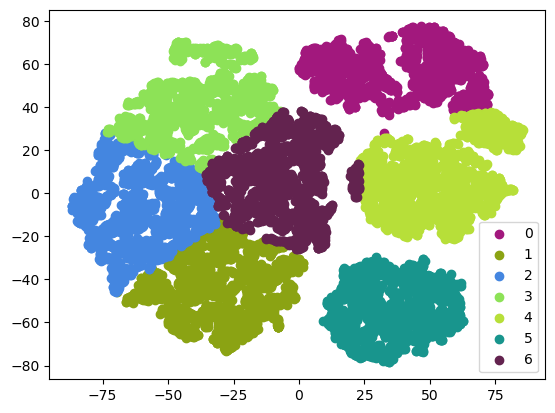

In [189]:
random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_tsne_2d_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]


# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_2d_labels_kmeans):
    plt.scatter(text_features_nor_tsne_fit_2d[text_features_nor_tsne_2d_labels_kmeans == label ,0], 
              text_features_nor_tsne_fit_2d[text_features_nor_tsne_2d_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
plt.legend()
plt.show()

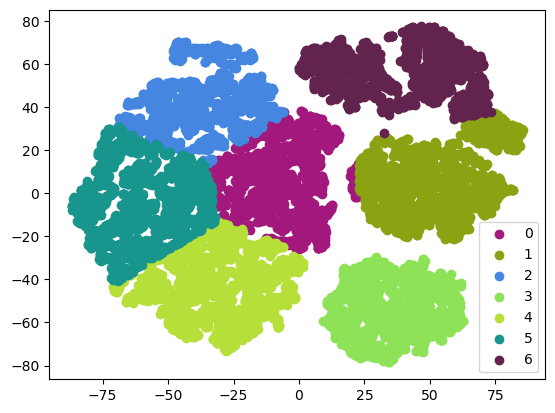

In [190]:
random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_tsne2d_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne2d_labels_gmm):
    plt.scatter(text_features_nor_tsne_fit_2d[text_features_nor_tsne2d_labels_gmm == label ,0], 
              text_features_nor_tsne_fit_2d[text_features_nor_tsne2d_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
plt.legend()
plt.show()

In [ ]:
# km_tsne1d_score_sil_list
# km_tsne1d_score_dav_list
# km_tsne1d_score_cal_list
# gmm_tsne1d_score_sil_list
# gmm_tsne1d_score_dav_list
# gmm_tsne1d_score_cal_list

# km_tsne2d_score_sil_list
# km_tsne2d_score_dav_list
# km_tsne2d_score_cal_list
# gmm_tsne2d_score_sil_list
# gmm_tsne2d_score_dav_list
# gmm_tsne2d_score_cal_list

# km_umap2d_score_sil_list
# km_umap2d_score_dav_list
# km_umap2d_score_cal_list
# gmm_umap2d_score_sil_list
# gmm_umap2d_score_dav_list
# gmm_umap2d_score_cal_list

# km_umap1d_score_sil_list
# km_umap1d_score_dav_list
# km_umap1d_score_cal_list
# gmm_umap1d_score_sil_list
# gmm_umap1d_score_dav_list
# gmm_umap1d_score_cal_list


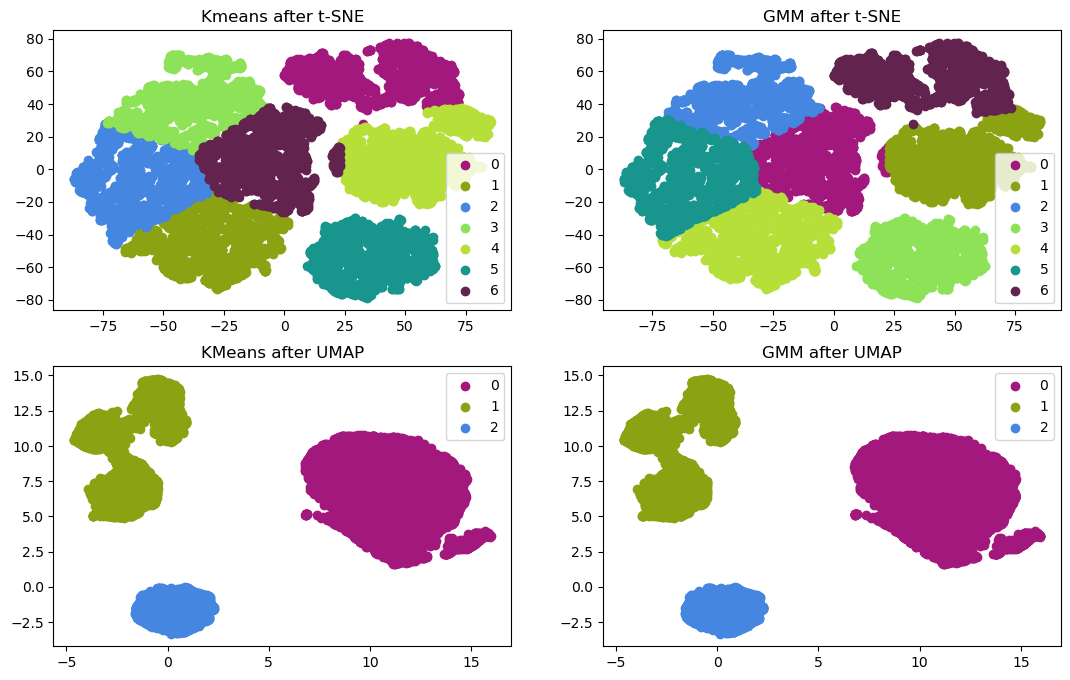

In [213]:
# n_cluster = [3,4,5,6,7,8,9,10,11,12]
figure, axis_vis = plt.subplots(2,2, figsize=(13, 8))


random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_tsne_2d_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]


# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_2d_labels_kmeans):
    axis_vis[0,0].scatter(text_features_nor_tsne_fit_2d[text_features_nor_tsne_2d_labels_kmeans == label ,0], 
              text_features_nor_tsne_fit_2d[text_features_nor_tsne_2d_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
axis_vis[0,0].legend()
axis_vis[0,0].set_title("Kmeans after t-SNE")
# plt.show()

random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_tsne2d_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne2d_labels_gmm):
    axis_vis[0,1].scatter(text_features_nor_tsne_fit_2d[text_features_nor_tsne2d_labels_gmm == label ,0], 
              text_features_nor_tsne_fit_2d[text_features_nor_tsne2d_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
axis_vis[0,1].legend()
axis_vis[0,1].set_title("GMM after t-SNE")
# plt.show()


random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_umap_2d_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]


# plt.figure(figsize=(12,10))
for label in set(text_features_nor_umap_2d_labels_kmeans):
    axis_vis[1,0].scatter(text_features_nor_umap_fit_2d[text_features_nor_umap_2d_labels_kmeans == label ,0], 
              text_features_nor_umap_fit_2d[text_features_nor_umap_2d_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
axis_vis[1,0].legend()
axis_vis[1,0].set_title("KMeans after UMAP")
# plt.show()

random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_umap2d_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_umap2d_labels_gmm):
    axis_vis[1,1].scatter(text_features_nor_umap_fit_2d[text_features_nor_umap2d_labels_gmm == label ,0], 
              text_features_nor_umap_fit_2d[text_features_nor_umap2d_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
axis_vis[1,1].legend()
axis_vis[1,1].set_title("GMM after UMAP")
# plt.show()

figure.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/DR_Cluster_Vis', facecolor='white', bbox_inches = Bbox([[0.5,0.15], [12.65,7.65]]))

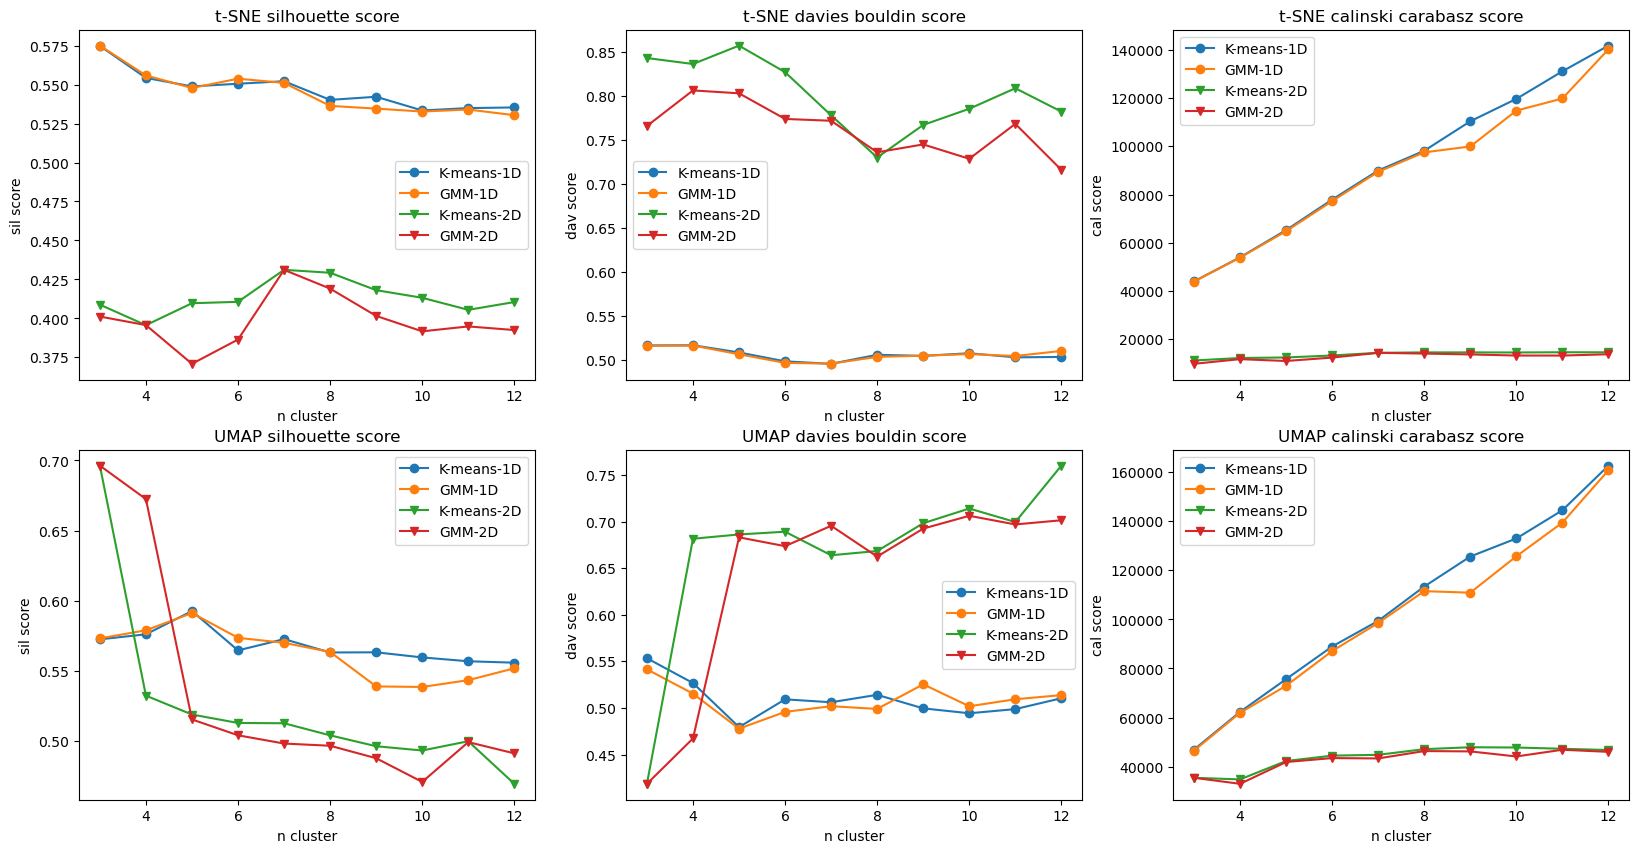

In [186]:
n_cluster = [3,4,5,6,7,8,9,10,11,12]
figure, axis_dr = plt.subplots(2,3, figsize=(20, 10))

axis_dr[0,0].plot(n_cluster, km_tsne1d_score_sil_list, label='K-means-1D', marker='o')
axis_dr[0,0].plot(n_cluster, gmm_tsne1d_score_sil_list,label='GMM-1D', marker='o')
axis_dr[0,0].plot(n_cluster, km_tsne2d_score_sil_list, label='K-means-2D', marker='v')
axis_dr[0,0].plot(n_cluster, gmm_tsne2d_score_sil_list,label='GMM-2D', marker='v')
axis_dr[0,0].set_title("t-SNE silhouette score")
axis_dr[0,0].set_ylabel("sil score")
axis_dr[0,0].set_xlabel("n cluster")
axis_dr[0,0].legend()

axis_dr[0,1].plot(n_cluster, km_tsne1d_score_dav_list, label='K-means-1D', marker='o')
axis_dr[0,1].plot(n_cluster, gmm_tsne1d_score_dav_list,label='GMM-1D', marker='o')
axis_dr[0,1].plot(n_cluster, km_tsne2d_score_dav_list, label='K-means-2D', marker='v')
axis_dr[0,1].plot(n_cluster, gmm_tsne2d_score_dav_list,label='GMM-2D', marker='v')
axis_dr[0,1].set_title("t-SNE davies bouldin score")
axis_dr[0,1].set_ylabel("dav score")
axis_dr[0,1].set_xlabel("n cluster")
axis_dr[0,1].legend()

axis_dr[0,2].plot(n_cluster, km_tsne1d_score_cal_list, label='K-means-1D', marker='o')
axis_dr[0,2].plot(n_cluster, gmm_tsne1d_score_cal_list,label='GMM-1D', marker='o')
axis_dr[0,2].plot(n_cluster, km_tsne2d_score_cal_list, label='K-means-2D', marker='v')
axis_dr[0,2].plot(n_cluster, gmm_tsne2d_score_cal_list,label='GMM-2D', marker='v')
axis_dr[0,2].set_title("t-SNE calinski carabasz score")
axis_dr[0,2].set_ylabel("cal score")
axis_dr[0,2].set_xlabel("n cluster")
axis_dr[0,2].legend()

axis_dr[1,0].plot(n_cluster, km_umap1d_score_sil_list, label='K-means-1D', marker='o')
axis_dr[1,0].plot(n_cluster, gmm_umap1d_score_sil_list,label='GMM-1D', marker='o')
axis_dr[1,0].plot(n_cluster, km_umap2d_score_sil_list, label='K-means-2D', marker='v')
axis_dr[1,0].plot(n_cluster, gmm_umap2d_score_sil_list,label='GMM-2D', marker='v')
axis_dr[1,0].set_title("UMAP silhouette score")
axis_dr[1,0].set_ylabel("sil score")
axis_dr[1,0].set_xlabel("n cluster")
axis_dr[1,0].legend()

axis_dr[1,1].plot(n_cluster, km_umap1d_score_dav_list, label='K-means-1D', marker='o')
axis_dr[1,1].plot(n_cluster, gmm_umap1d_score_dav_list,label='GMM-1D', marker='o')
axis_dr[1,1].plot(n_cluster, km_umap2d_score_dav_list, label='K-means-2D', marker='v')
axis_dr[1,1].plot(n_cluster, gmm_umap2d_score_dav_list,label='GMM-2D', marker='v')
axis_dr[1,1].set_title("UMAP davies bouldin score")
axis_dr[1,1].set_ylabel("dav score")
axis_dr[1,1].set_xlabel("n cluster")
axis_dr[1,1].legend()

axis_dr[1,2].plot(n_cluster, km_umap1d_score_cal_list, label='K-means-1D', marker='o')
axis_dr[1,2].plot(n_cluster, gmm_umap1d_score_cal_list,label='GMM-1D', marker='o')
axis_dr[1,2].plot(n_cluster, km_umap2d_score_cal_list, label='K-means-2D', marker='v')
axis_dr[1,2].plot(n_cluster, gmm_umap2d_score_cal_list,label='GMM-2D', marker='v')
axis_dr[1,2].set_title("UMAP calinski carabasz score")
axis_dr[1,2].set_ylabel("cal score")
axis_dr[1,2].set_xlabel("n cluster")
axis_dr[1,2].legend()


figure.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/combine_score_KM_GMM_with_DR', facecolor='white', bbox_inches = Bbox([[1.25,0.45], [18.5,9.5]]))

In [ ]:
n_cluster = [3,4,5,6,7,8,9,10,11,12]

# cubic_interpolation_model_km = interp1d(n_cluster, km_score_sil_list, kind = "cubic")
# cubic_interpolation_model_gmm = interp1d(n_cluster, gmm_score_sil_list, kind = "cubic")

# # Plotting the Graph
# X_=np.linspace(min(n_cluster), max(n_cluster), 500)

# Y_km = cubic_interpolation_model_km(X_)
# Y_gmm = cubic_interpolation_model_gmm(X_)

# plt.plot(X_, Y_km, label='K-means', marker='o')
# plt.plot(X_, Y_gmm,label='GMM')

plt.plot(n_cluster, km_score_sil_list, label='K-means', marker='o')
plt.plot(n_cluster, gmm_score_sil_list,label='GMM', marker='v')

plt.legend()
plt.xlabel("n cluster")
plt.ylabel("silhouette score")
plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/Sil_score_KM_GMM', facecolor='white', bbox_inches = Bbox([[0,0], [6.4,5]]))
plt.show()
plt.close()

In [25]:
readability_score_nor_umap = umap.UMAP(random_state=42, n_components=1)
readability_score_nor_umap_fit = readability_score_nor_umap.fit_transform(readability_score_nor_array)
print(readability_score_nor_umap_fit)

[[21.094229]
 [20.472433]
 [-8.299669]
 ...
 [16.377754]
 [25.712105]
 [23.172514]]


In [26]:
# readability_score_nor_fit = minmax_scale(readability_score_nor_fit, feature_range=(-2,2))
# Material_difficuly_by_score_DR = pd.DataFrame(data=readability_score_nor_fit, columns=["Material Difficulty"])
# display(Material_difficuly_by_score_DR)
# Material_difficuly_by_score_DR.to_csv("Data/Diffculty Level/Material_difficuly_by_score_DR.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

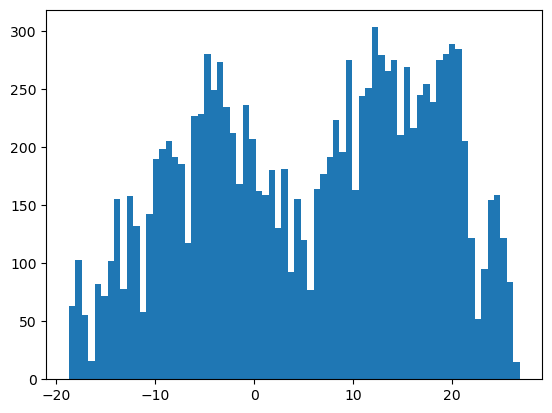

In [27]:
plt.hist(readability_score_nor_umap_fit, bins=70)
plt.show

In [28]:
readability_score_nor_tsne = TSNE(random_state=42, n_components=1)
readability_score_nor_tsne_fit = readability_score_nor_tsne.fit_transform(readability_score_nor_array)
print(readability_score_nor_tsne_fit)

D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda Python\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[-62.059635 ]
 [-86.27858  ]
 [ 90.02354  ]
 ...
 [ -6.903531 ]
 [  1.6118021]
 [ -2.9524255]]


<function matplotlib.pyplot.show(close=None, block=None)>

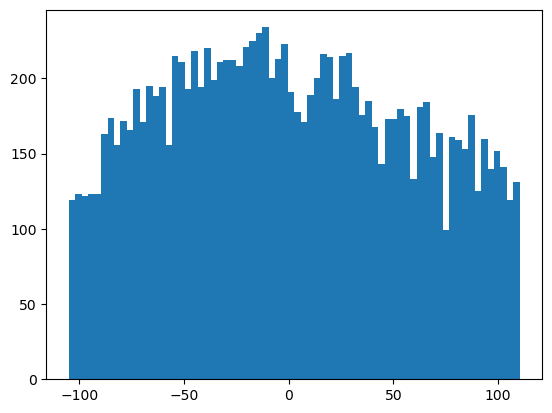

In [29]:
plt.hist(readability_score_nor_tsne_fit, bins=70)
plt.show

In [31]:
# plt.scatter(text_features_nor_umap_fit[:, 0], text_features_nor_umap_fit[:,1])

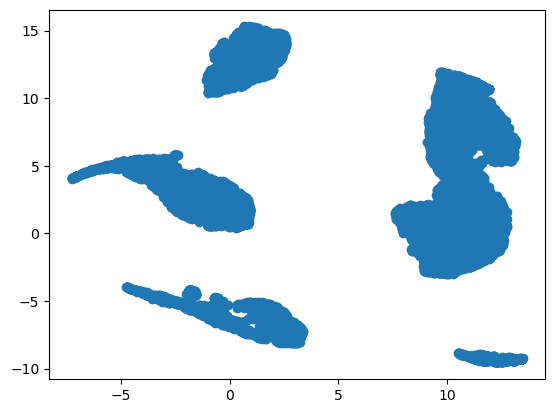

In [42]:
plt.scatter(readability_score_nor_umap_fit[:, 0], readability_score_nor_umap_fit[:,1])

In [30]:
text_features_nor_tsne_cluster= cluster.KMeans(n_clusters = 4, random_state = 42)
text_features_nor_tsne_labels_kmeans = text_features_nor_tsne_cluster.fit_predict(text_features_nor_tsne_fit)
print(text_features_nor_tsne_labels_kmeans)

[3 3 2 ... 0 1 1]


In [31]:
text_features_nor_umap_cluster= cluster.KMeans(n_clusters = 7, random_state = 42)
text_features_nor_umap_labels_kmeans = text_features_nor_umap_cluster.fit_predict(text_features_nor_umap_fit)
print(text_features_nor_umap_labels_kmeans)

[0 4 6 ... 2 5 4]


In [32]:
text_features_nor_cluster= cluster.KMeans(n_clusters = 7, random_state = 42)
text_features_nor_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_array)
print(text_features_nor_labels_kmeans)

[1 1 6 ... 1 1 1]


In [33]:
score_tsne_sil = silhouette_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by sil:", score_tsne_sil)

score_tsne_dav = davies_bouldin_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by dav:", score_tsne_dav)

score_tsne_cal = calinski_harabasz_score(text_features_nor_tsne_fit, text_features_nor_tsne_labels_kmeans)
print("Text feature after tsne by cal:", score_tsne_cal)

score_umap_sil = silhouette_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by sil:", score_umap_sil)

score_umap_dav = davies_bouldin_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by dav:", score_umap_dav)

score_umap_cal = calinski_harabasz_score(text_features_nor_umap_fit, text_features_nor_umap_labels_kmeans)
print("Text feature after umap by cal:", score_umap_cal)

score_sil = silhouette_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by sil:", score_sil)

score_dav = davies_bouldin_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by dav:", score_dav)

score_cal = calinski_harabasz_score(text_features_nor_array, text_features_nor_labels_kmeans)
print("Text feature by cal:", score_cal)

Text feature after tsne by sil: 0.55429184
Text feature after tsne by dav: 0.5165634047953687
Text feature after tsne by cal: 53971.04266492191
Text feature after umap by sil: 0.57279587
Text feature after umap by dav: 0.5061090452093392
Text feature after umap by cal: 99390.95424448978
Text feature by sil: 0.5081619884844278
Text feature by dav: 1.1523828326110606
Text feature by cal: 12826.009844023565


# No DR PART

### Evaluate Cluster by K-means

In [78]:
km_score_sil_list = []
km_score_dav_list = []
km_score_cal_list = []

for i in range(3, 13):
    text_features_nor_cluster= cluster.KMeans(n_clusters = i, random_state = 42)
    text_features_nor_labels_kmeans = text_features_nor_cluster.fit_predict(text_features_nor_array)
    print(text_features_nor_labels_kmeans)
    score_sil = silhouette_score(text_features_nor_array, text_features_nor_labels_kmeans)
    km_score_sil_list.append(score_sil)
    score_dav = davies_bouldin_score(text_features_nor_array, text_features_nor_labels_kmeans)
    km_score_dav_list.append(score_dav)
    score_cal = calinski_harabasz_score(text_features_nor_array, text_features_nor_labels_kmeans)
    km_score_cal_list.append(score_cal)
print(km_score_sil_list)
print(km_score_dav_list)
print(km_score_cal_list)

[0 0 0 ... 0 0 0]
[1 1 2 ... 1 1 1]
[0 0 4 ... 0 0 0]
[0 0 5 ... 0 0 0]
[1 1 6 ... 1 1 1]
[0 0 3 ... 0 0 0]
[8 8 3 ... 0 0 8]
[1 1 4 ... 5 5 1]
[0 0 4 ... 5 5 0]
[8 8 4 ... 0 0 8]
[0.5986255006941309, 0.5439605831943628, 0.5189186143298697, 0.5166132826177657, 0.5081619884844278, 0.5057968734168572, 0.2637516357942595, 0.263146509903708, 0.2625324531369324, 0.2506918590493667]
[0.9661643458833021, 0.9321041813017702, 0.9894916252125769, 1.0968524810401437, 1.1523828326110606, 1.1823391398261216, 1.2931753929812457, 1.352000360201909, 1.3340227344039286, 1.3522263247455664]
[16798.385780514935, 16673.746424067343, 15451.932799568494, 14117.086592433, 12826.009844023565, 11827.257428256438, 10954.147173678204, 10304.781140296685, 9749.833772312702, 9196.832928906857]


### Evaluate Cluster by GMM

In [79]:
gmm_score_sil_list = []
gmm_score_dav_list = []
gmm_score_cal_list = []

for i in range(3, 13):
    text_features_gmm_model = GaussianMixture(n_components=i, covariance_type='spherical')
    text_features_nor_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_array)
    print(text_features_nor_labels_gmm)
    score_sil = silhouette_score(text_features_nor_array, text_features_nor_labels_gmm)
    gmm_score_sil_list.append(score_sil)
    score_dav = davies_bouldin_score(text_features_nor_array, text_features_nor_labels_gmm)
    gmm_score_dav_list.append(score_dav)
    score_cal = calinski_harabasz_score(text_features_nor_array, text_features_nor_labels_gmm)
    gmm_score_cal_list.append(score_cal)
print(gmm_score_sil_list)
print(gmm_score_dav_list)
print(gmm_score_cal_list)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]
[0 0 2 ... 0 0 0]
[1 1 4 ... 1 1 1]
[1 1 3 ... 1 1 1]
[5 5 0 ... 2 2 5]
[0 0 5 ... 8 8 0]
[1 1 8 ... 1 1 1]
[5 5 8 ... 1 9 9]
[9 9 5 ... 7 1 1]
[0.4693808447121567, 0.5029820088199101, 0.5022493030928392, 0.5001241780974918, 0.49234454991540716, 0.2565587328902916, 0.24988792530878745, 0.47317640084646934, 0.24163120075179204, 0.23759722726929597]
[0.90264660056692, 0.9858731262052993, 0.9696623542235845, 1.1377082863835175, 1.2253268160315418, 1.3487083414542222, 1.919458801750046, 1.711663373902492, 1.7181797168437853, 1.7212439919996863]
[13898.826949655304, 15275.498651448313, 14565.021604382518, 13477.10232286043, 11960.191175194255, 10723.554055789873, 9020.80733269029, 8772.263469663085, 8295.540799882132, 7732.289296529923]


### Plot Silhouette score by KM and GMM

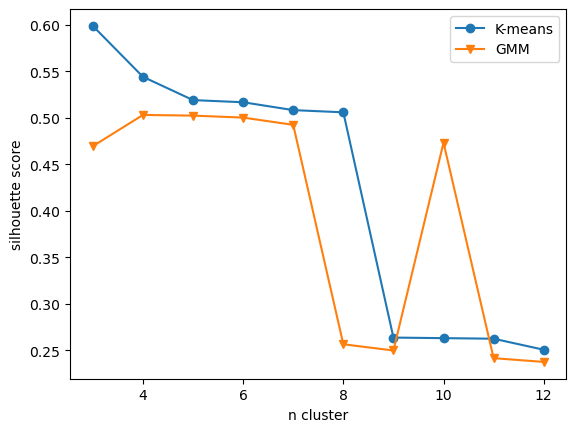

In [121]:
n_cluster = [3,4,5,6,7,8,9,10,11,12]

cubic_interpolation_model_km = interp1d(n_cluster, km_score_sil_list, kind = "cubic")
cubic_interpolation_model_gmm = interp1d(n_cluster, gmm_score_sil_list, kind = "cubic")

# Plotting the Graph
X_=np.linspace(min(n_cluster), max(n_cluster), 500)

Y_km = cubic_interpolation_model_km(X_)
Y_gmm = cubic_interpolation_model_gmm(X_)

plt.plot(n_cluster, km_score_sil_list, label='K-means', marker='o')
plt.plot(n_cluster, gmm_score_sil_list,label='GMM', marker='v')
# plt.plot(X_, Y_km, label='K-means', marker='o')
# plt.plot(X_, Y_gmm,label='GMM')

plt.legend()
plt.xlabel("n cluster")
plt.ylabel("silhouette score")
plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/Sil_score_KM_GMM', facecolor='white', bbox_inches = Bbox([[0,0], [6.4,5]]))
plt.show()
plt.close()

### Plot Davies Bouldin score by KM and GMM

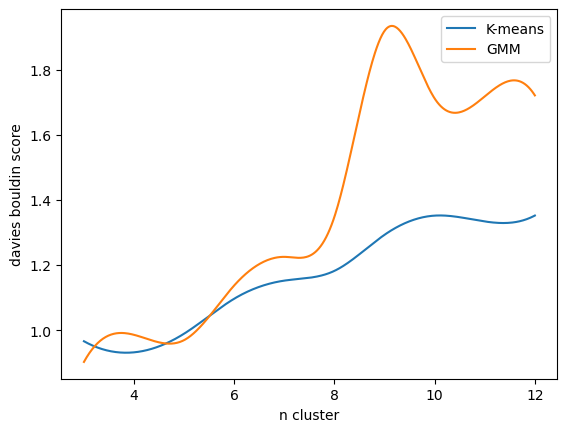

In [94]:
n_cluster = [3,4,5,6,7,8,9,10,11,12]
cubic_interpolation_model_km = interp1d(n_cluster, km_score_dav_list, kind = "cubic")
cubic_interpolation_model_gmm = interp1d(n_cluster, gmm_score_dav_list, kind = "cubic")

# Plotting the Graph
X_=np.linspace(min(n_cluster), max(n_cluster), 500)

Y_km = cubic_interpolation_model_km(X_)
Y_gmm = cubic_interpolation_model_gmm(X_)


# plt.plot(n_cluster, km_score_dav_list, label='K-means')
# plt.plot(n_cluster, gmm_score_dav_list,label='GMM')
plt.plot(X_, Y_km, label='K-means')
plt.plot(X_, Y_gmm,label='GMM')

plt.legend()
plt.xlabel("n cluster")
plt.ylabel("davies bouldin score")
plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/Dav_score_KM_GMM', facecolor='white', bbox_inches = Bbox([[0,0], [6.4,5]]))
plt.show()
plt.close()

### Plot Calinski Harabasz score by KM and GMM

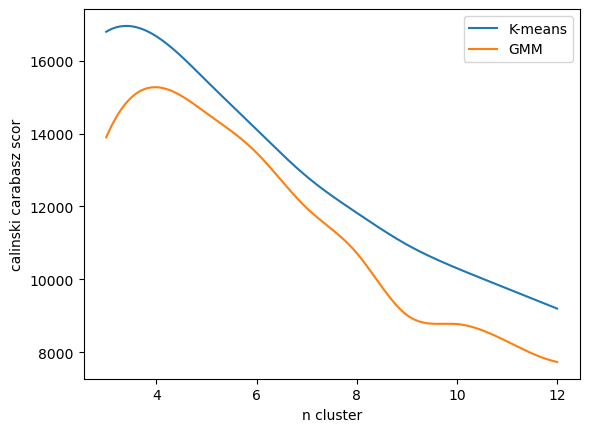

In [96]:
n_cluster = [3,4,5,6,7,8,9,10,11,12]

cubic_interpolation_model_km = interp1d(n_cluster, km_score_cal_list, kind = "cubic")
cubic_interpolation_model_gmm = interp1d(n_cluster, gmm_score_cal_list, kind = "cubic")

# Plotting the Graph
X_=np.linspace(min(n_cluster), max(n_cluster), 500)

Y_km = cubic_interpolation_model_km(X_)
Y_gmm = cubic_interpolation_model_gmm(X_)


plt.plot(X_, Y_km, label='K-means')
plt.plot(X_, Y_gmm,label='GMM')

# plt.plot(n_cluster, km_score_cal_list, label='K-means')
# plt.plot(n_cluster, gmm_score_cal_list,label='GMM')
plt.legend()
plt.xlabel("n cluster")
plt.ylabel("calinski carabasz score")
plt.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/Cal_score_KM_GMM', facecolor='white', bbox_inches = Bbox([[0,0], [6.4,5]]))
plt.show()
plt.close()

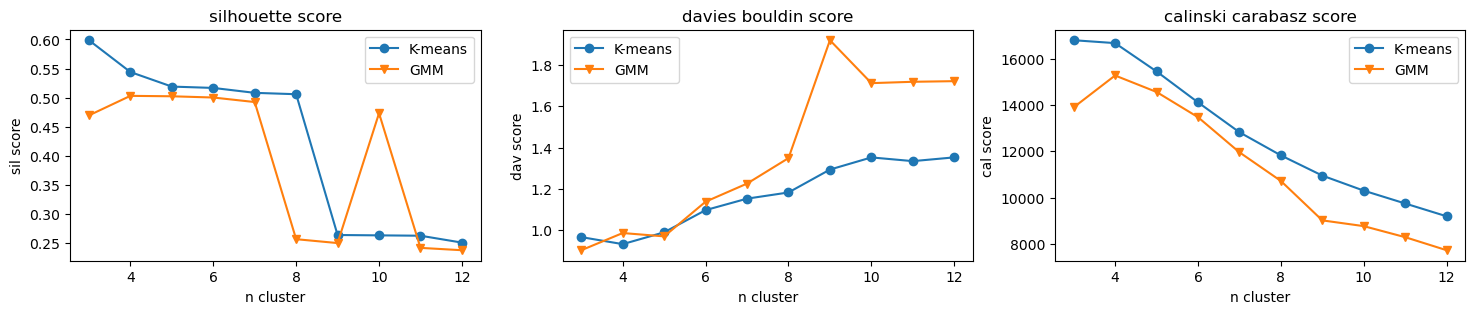

In [156]:
figure, axis = plt.subplots(1,3, figsize=(18, 3))

axis[0].plot(n_cluster, km_score_sil_list, label='K-means', marker='o')
axis[0].plot(n_cluster, gmm_score_sil_list,label='GMM', marker='v')
axis[0].set_title("silhouette score")
axis[0].set_ylabel("sil score")
axis[0].set_xlabel("n cluster")
axis[0].legend()

axis[1].plot(n_cluster, km_score_dav_list, label='K-means', marker='o')
axis[1].plot(n_cluster, gmm_score_dav_list,label='GMM', marker='v')
axis[1].set_title("davies bouldin score")
axis[1].set_ylabel("dav score")
axis[1].set_xlabel("n cluster")
axis[1].legend()

axis[2].plot(n_cluster, km_score_cal_list, label='K-means', marker='o')
axis[2].plot(n_cluster, gmm_score_cal_list,label='GMM', marker='v')
axis[2].set_title("calinski carabasz score")
axis[2].set_ylabel("cal score")
axis[2].set_xlabel("n cluster")
axis[2].legend()

figure.savefig('D:/Master in UoB/TB3 of UoB/Report/Draw Diagram/Cluster Plot/combine_score_KM_GMM', facecolor='white', bbox_inches = Bbox([[1.0,-0.4], [17,3]]))

In [38]:
index_lebel0 = []
index_lebel1 = []
index_lebel2 = []
index_lebel3 = []
index_lebel4 = []
index_lebel5 = []
index_lebel6 = []

for i, l in enumerate(text_features_nor_umap_labels_kmeans):
    if l==0:
        index_lebel0.append(i)
    elif l==1:
        index_lebel1.append(i)
    elif l==2:
        index_lebel2.append(i)
    elif l==3:
        index_lebel3.append(i)
    elif l==4:
        index_lebel4.append(i)
    elif l==5:
        index_lebel5.append(i)
    elif l==6:
        index_lebel6.append(i)

In [34]:
index_lebel0 = []
index_lebel1 = []
index_lebel2 = []
index_lebel3 = []
index_lebel4 = []
index_lebel5 = []
index_lebel6 = []

for i, l in enumerate(text_features_nor_labels_kmeans):
    if l==0:
        index_lebel0.append(i)
    elif l==1:
        index_lebel1.append(i)
    elif l==2:
        index_lebel2.append(i)
    elif l==3:
        index_lebel3.append(i)
    elif l==4:
        index_lebel4.append(i)
    elif l==5:
        index_lebel5.append(i)
    elif l==6:
        index_lebel6.append(i)

In [35]:
print("label 0:")
for i in index_lebel0[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 1:")
for i in index_lebel1[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

print("label 2:")
for i in index_lebel2[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 3:")
for i in index_lebel3[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

print("label 4:")    
for i in index_lebel4[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)
    
print("label 5:")
for i in index_lebel5[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
   print(sum(text_features_nor_array[i])/5)

print("label 6:")
for i in index_lebel6[0:20]:
#     print(list(dataf[i].keys())[0])
#     print(text_features_nor_umap_fit[i])
#     print(text_features_nor_array[i])
    print(sum(text_features_nor_array[i])/5)

label 0:
0.8410849976330415
0.9261414093527123
0.9036181411299695
0.8669369202580448
0.9242850991275325
1.0281303667935797
0.8670257311954881
1.010994447521353
0.8686432195845984
0.9513206472338431
0.8611932752191482
0.839672402700782
1.017710718597369
0.901338874680307
1.0014329429712387
0.9489827469413147
0.8939487716035031
0.9316662375329757
1.0781170254500072
0.8739797699705356
label 1:
0.25546900161030595
0.23610345095735114
0.21146355498721228
0.20534676044330777
0.25168453072928776
0.22676500946083628
0.17465768329070755
0.2152526697177727
0.20998401534526856
0.19931044080036103
0.2662789855072464
0.17392623502490234
0.18968918612325714
0.23302253522892533
0.20532960358056265
0.24899829497016196
0.2266032103917081
0.22927476555839724
0.17925823910800015
0.20029384572419665
label 2:
0.7311413494193114
0.6509156010230178
0.6695529092071612
0.6164551093636674
0.6191640711128713
0.6232229304312304
0.6960103121516165
0.651326992885837
0.5524581970300757
0.6355962732919253
0.661115943

In [43]:
materials_difficulty_cluster_directly = np.zeros(len(text_features_nor_labels_kmeans))
l1=0
l2=0
l3=0
l4=0
l5=0
l6=0
l7=0

for i,l in enumerate(text_features_nor_labels_kmeans):
    if l==0:
        l1+=0.01
        if l1>0.7:
            l1=0
        materials_difficulty_cluster_directly[i]=4.2+l1
    elif l==1:
        l2+=0.01
        if l2>0.7:
            l2=0
        materials_difficulty_cluster_directly[i]=0+l2
    if l==2:
        l3+=0.01
        if l3>0.7:
            l3=0
        materials_difficulty_cluster_directly[i]=2.1+l3
    elif l==3:
        l4+=0.01
        if l4>=0.7:
            l4=0
        materials_difficulty_cluster_directly[i]=1.4+l4
    if l==4:
        l5+=0.01
        if l5>0.7:
            l5=0
        materials_difficulty_cluster_directly[i]=3.5+l5
    elif l==5:
        l6+=0.01
        if l6>0.7:
            l6=0
        materials_difficulty_cluster_directly[i]=2.8+l6
    if l==6:
        l7+=0.01
        if l7>0.7:
            l7=0
        materials_difficulty_cluster_directly[i]=0.7+l7

In [41]:
materials_difficulty_cluster = np.zeros(len(text_features_nor_umap_labels_kmeans))
l1=0
l2=0
l3=0
l4=0
l5=0
l6=0
l7=0

for i,l in enumerate(text_features_nor_umap_labels_kmeans):
    if l==0:
        l1+=0.01
        if l1>0.5:
            l1=0
        materials_difficulty_cluster[i]=1.8+l1
    elif l==1:
        l2+=0.01
        if l2>0.5:
            l2=0
        materials_difficulty_cluster[i]=3.6+l2
    if l==2:
        l3+=0.01
        if l3>=0.5:
            l3=0
        materials_difficulty_cluster[i]=0.6+l3
    elif l==3:
        l4+=0.01
        if l4>=0.5:
            l4=0
        materials_difficulty_cluster[i]=3+l4
    if l==4:
        l5+=0.01
        if l5>=0.5:
            l5=0
        materials_difficulty_cluster[i]=1.2+l5
    elif l==5:
        l6+=0.01
        if l6>=0.5:
            l6=0
        materials_difficulty_cluster[i]=0+l6
    if l==6:
        l7+=0.01
        if l7>=0.5:
            l7=0
        materials_difficulty_cluster[i]=2.4+l7

In [44]:
print(len(materials_difficulty_cluster_directly))

materials_difficulty_cluster_df = pd.DataFrame(data=materials_difficulty_cluster_directly, columns=["Materials Difficulty"])
display(materials_difficulty_cluster_df)
# materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_0_4.csv", index=False)
materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_directely_0_5.csv", index=False)
# materials_difficulty_cluster_df.to_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_with_quesLen.csv", index=False)

12447


,Materials Difficulty
0,0.01
1,0.02
2,0.71
3,2.11
4,1.41
...,...
12442,0.49
12443,1.28
12444,0.50
12445,0.51


In [66]:
materials_difficulty_cluster = materials_difficulty_cluster_df
# materials_difficulty_cluster = pd.read_csv("Data/Diffculty Level/Mateials_diffculty_by_cluster_without_quesLen.csv")
questionsLen = []
for i, data in tqdm(enumerate(dataf)):
    ques = list(data.values())[0]
    questionsLen.append(len(ques))
    
materials_difficulty_cluster["discrimination"] = questionsLen
materials_difficulty_cluster = materials_difficulty_cluster[["discrimination", "Materials Difficulty"]]
display(materials_difficulty_cluster)
materials_difficulty_cluster.to_csv("Data/Diffculty Level/Mateials_diffculty_discrimination_by_cluster_with_quesLen.csv", index=False)

12447it [00:00, 1143299.87it/s]


,discrimination,Materials Difficulty
0,1,0.01
1,1,-0.99
2,2,1.01
3,3,2.01
4,3,2.02
...,...,...
12442,1,-2.77
12443,2,1.14
12444,1,-1.56
12445,1,-2.76


In [63]:
readability_score_nor_tsne_cluster= cluster.KMeans(n_clusters = 5, random_state = 42)
readability_score_nor_tsne_labels_kmeans = readability_score_nor_tsne_cluster.fit_predict(readability_score_nor_tsne_fit)
print(readability_score_nor_tsne_labels_kmeans)

[2 2 3 ... 4 4 4]


In [64]:
readability_score_nor_umap_cluster= cluster.KMeans(n_clusters = 5, random_state = 42)
readability_score_nor_umap_labels_kmeans = readability_score_nor_umap_cluster.fit_predict(readability_score_nor_umap_fit)
print(readability_score_nor_umap_labels_kmeans)

[3 3 1 ... 2 3 3]


In [65]:
score_tsne_sil = silhouette_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by sil:", score_tsne_sil)

score_tsne_dav = davies_bouldin_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by dav:", score_tsne_dav)

score_tsne_cal = calinski_harabasz_score(readability_score_nor_tsne_fit, readability_score_nor_tsne_labels_kmeans)
print("Text feature after tsne by cal:", score_tsne_cal)

score_umap_sil = silhouette_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by sil:", score_umap_sil)

score_umap_dav = davies_bouldin_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by dav:", score_umap_dav)

score_umap_cal = calinski_harabasz_score(readability_score_nor_umap_fit, readability_score_nor_umap_labels_kmeans)
print("Text feature after umap by cal:", score_umap_cal)

Text feature after tsne by sil: 0.5479454
Text feature after tsne by dav: 0.5107472251780878
Text feature after tsne by cal: 65217.89493005159
Text feature after umap by sil: 0.5470895
Text feature after umap by dav: 0.526627900546677
Text feature after umap by cal: 64755.01224908949


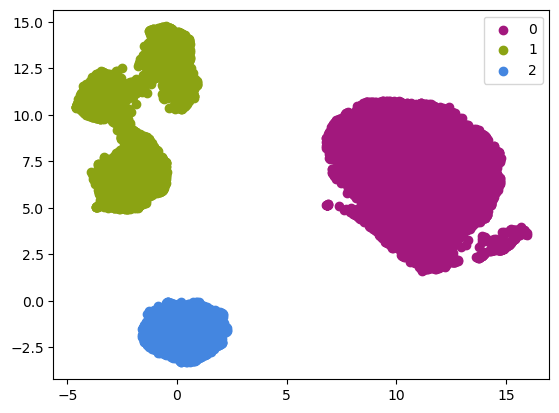

In [49]:
random.seed(10)
color_text_features_kmeans = {}
for c in set(text_features_nor_tsne_labels_kmeans):
    color_text_features_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]



# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_labels_kmeans):
    plt.scatter(text_features_nor_fit[text_features_nor_tsne_labels_kmeans == label ,0], 
              text_features_nor_fit[text_features_nor_tsne_labels_kmeans == label,1], c=color_text_features_kmeans[label], label=label)
plt.legend()
plt.show()

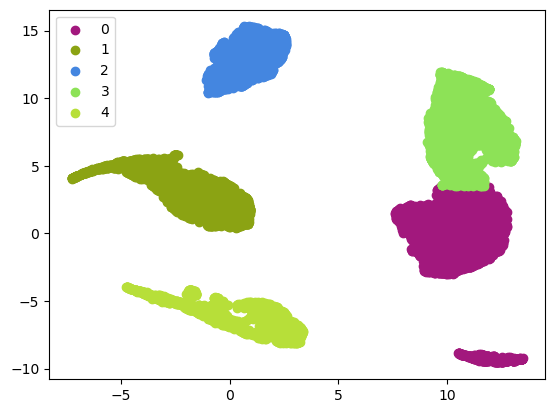

In [51]:
random.seed(10)
color_readability_score_kmeans = {}
for c in set(readability_score_nor_tsne_labels_kmeans):
    color_readability_score_kmeans[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]



# plt.figure(figsize=(12,10))
for label in set(readability_score_nor_tsne_labels_kmeans):
    plt.scatter(readability_score_nor_fit[readability_score_nor_tsne_labels_kmeans == label ,0], 
              readability_score_nor_fit[readability_score_nor_tsne_labels_kmeans == label,1], c=color_readability_score_kmeans[label], label=label)
plt.legend()
plt.show()

In [32]:
n_clusters = 1
text_features_gmm_model = GaussianMixture(n_components=n_clusters, covariance_type='spherical')
text_features_nor_tsne_labels_gmm = text_features_gmm_model.fit_predict(text_features_nor_fit)

<function matplotlib.pyplot.show(close=None, block=None)>

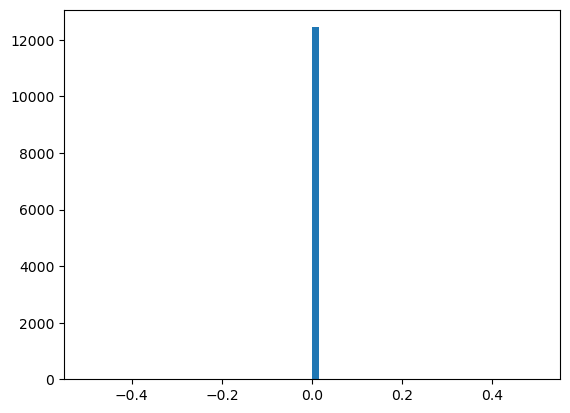

In [33]:
plt.hist(text_features_nor_tsne_labels_gmm, bins=70)
plt.show

In [34]:
n_clusters = 1
readability_score_gmm_model = GaussianMixture(n_components=n_clusters, covariance_type='spherical')
readability_score_nor_tsne_labels_gmm = readability_score_gmm_model.fit_predict(readability_score_nor_fit)

<function matplotlib.pyplot.show(close=None, block=None)>

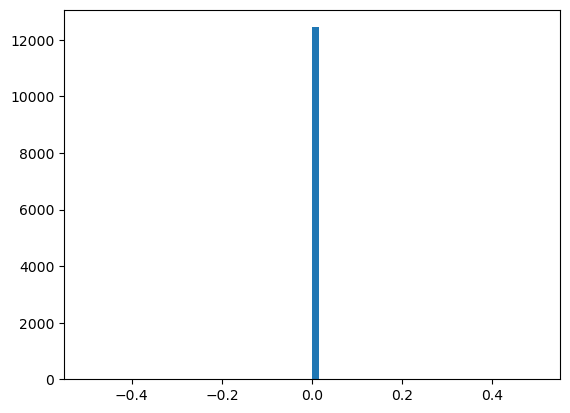

In [35]:
plt.hist(text_features_nor_tsne_labels_gmm, bins=70)
plt.show

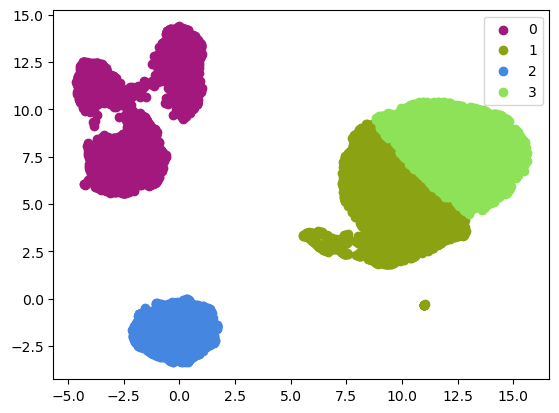

In [31]:
random.seed(10)
color_text_features_gmm = {}
for c in set(text_features_nor_tsne_labels_gmm):
    color_text_features_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(text_features_nor_tsne_labels_gmm):
    plt.scatter(text_features_nor_fit[text_features_nor_tsne_labels_gmm == label ,0], 
              text_features_nor_fit[text_features_nor_tsne_labels_gmm == label,1], c=color_text_features_gmm[label], label=label)
plt.legend()
plt.show()

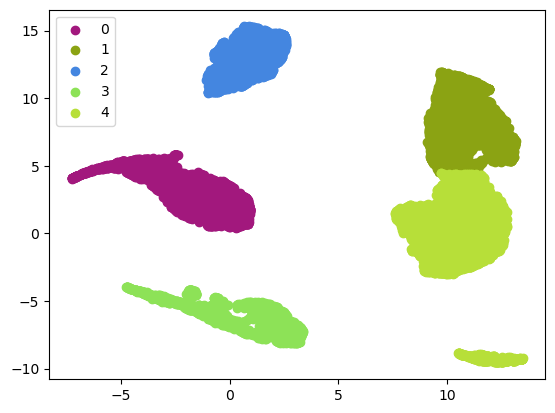

In [56]:
random.seed(10)
color_readability_score_gmm = {}
for c in set(readability_score_nor_tsne_labels_gmm):
    color_readability_score_gmm[c] = '#' + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4] + hex(random.randint(16, 255))[2:4]

    
# plt.figure(figsize=(12,10))
for label in set(readability_score_nor_tsne_labels_gmm):
    plt.scatter(readability_score_nor_fit[readability_score_nor_tsne_labels_gmm == label ,0], 
              readability_score_nor_fit[readability_score_nor_tsne_labels_gmm == label,1], c=color_readability_score_gmm[label], label=label)
plt.legend()
plt.show()

In [25]:
train0 = pd.read_csv("D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\DeepIRT\data\mydata\my_data_valid1.txt",sep='\t')
train0.to_csv("D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\DeepIRT\data\mydata\my_data_valid1.csv", 
              index=False)

In [31]:
import csv

rows = [[4], [415,841,87,95], [1,1,1,1], [4], [54,22,84,31], [1,0,1,0]]
with open("D:\Master in UoB\TB3 of UoB\Final Project\Code Implement\DeepIRT\data\mydata\my_data_valid1.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)